# Survival of guinea pigs by type of experiment

#### Dataset description
Data represent survival time (in days) of guinea pigs that were randomly assigned to either the control group or the treatment group that received a dose of TB bacilli.

In [1]:
import pandas as pd
import numpy as np
import math
from math import sqrt
import scipy.stats as stats
from scipy.stats import norm, uniform, expon, t, ttest_ind, moment
from scipy.stats.distributions import uniform, expon, norm

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

## 1.Task
> Load the data file and split the observed variable into the appropriate two observation groups. Briefly describe the data and the problem under study.

> For each group separately, estimate the mean, variance and median of the respective distribution.

Read data from file `ex0211.csv`

In [2]:
data = pd.read_csv('ex0211.csv')

Let's see what the data file looks like.

In [3]:
data.head()

,Lifetime,Group
0,18,Control
1,36,Control
2,50,Control
3,52,Control
4,86,Control


Find that the dataset contains two columns `Lifetime` a `Group`. 

In [4]:
display(data.nunique())
display(data.info())
display(data.shape)

Lifetime    105
Group         2
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Lifetime  122 non-null    int64 
 1   Group     122 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.0+ KB


None

(122, 2)

* The dataset contains 122 data points, two variables have no missing values. 
* Values of the `Lifetime` variable are of the **int64** type, values of the `Group` variable are of the **object** type.

#### Dataset format
Dataset with 122 observations of these two variables: 
* **Lifetime** - survival time of guinea pig (in days);
* **Group** - group factor with values `Bacilli` and `Control`, indicating the group to which the guinea pig was assigned.

* Find out how many unique values the `Group` column contains.

In [5]:
print('The "Group" column contains the following unique values: ' + str(data.Group.unique()))

The "Group" column contains the following unique values: ['Control' 'Bacilli']


* Divide the data into 2 groups: `Control` and `Bacilli`.

In [6]:
control = data[data['Group'] == 'Control']
bacilli = data[data['Group'] == 'Bacilli']

* For each group separately, estimate the `mean`, `variance` and `median` of the respective distribution.

In [7]:
def describe(group, name):
    print(f'Mean of the group "{name}": {(group.Lifetime).mean():.2f}')
    print(f'Variance of the group "{name}": {(group.Lifetime).var():.2f}')
    print(f'Median of the group "{name}": {(group.Lifetime).median():.2f}')

In [8]:
describe(control, 'Control')

Mean of the group "Control": 345.23
Variance of the group "Control": 49371.67
Median of the group "Control": 316.50


In [9]:
describe(bacilli, 'Bacilli')

Mean of the group "Bacilli": 242.53
Variance of the group "Bacilli": 13907.69
Median of the group "Bacilli": 214.50


## 2.Task
> For each group separately, estimate the density and distribution function using the histogram and empirical distribution function.

* To complete this task, use the `show_plots` function to create histograms and kernel density estimation (KDE) plots for a given group. The KDE plot provides a smoothed, continuous representation of the data distribution.

* The `draw_hist_n_density` function specifically generates the histogram and KDE plots. It takes parameters such as **axes**, **data**, **the number of bins**, and **color** to customize the visualization. This function is designed to provide a concise visual representation of data distribution.

* Additionally, the empirical distribution function is estimated using a histogram with the `cumulative=True` parameter set. This results in a plot that provides a visual representation of how the data accumulates.

In [10]:
def draw_hist_n_density( ax, x, nbins, color ):
    ax.set_ylabel('Density')
    ax.set_xlabel('Lifetime')
    ax.grid(True, alpha=0.5)
    ax.hist(x, bins=nbins, density=True, color=color)
    sns.kdeplot(x, ax=ax, lw=3, label='Density')

def show_plots(group, label, color='orange'):
    nbins=20
    x = group.values

    fig,(ax1, ax2) = plt.subplots(1,2,figsize=(15,6))
    
    ax1.set_title('Density of the group ' + label)
    draw_hist_n_density ( ax1, x, nbins, color )
    
    ax2.set_ylabel('Cumulative Distribution function')
    ax2.set_xlabel('Lifetime')
    ax2.set_title('Empirical group distribution function ' + label)
    ax2.grid(True, alpha=0.5)
    ax2.hist(x, bins=nbins, density=True, cumulative=True, color=color)

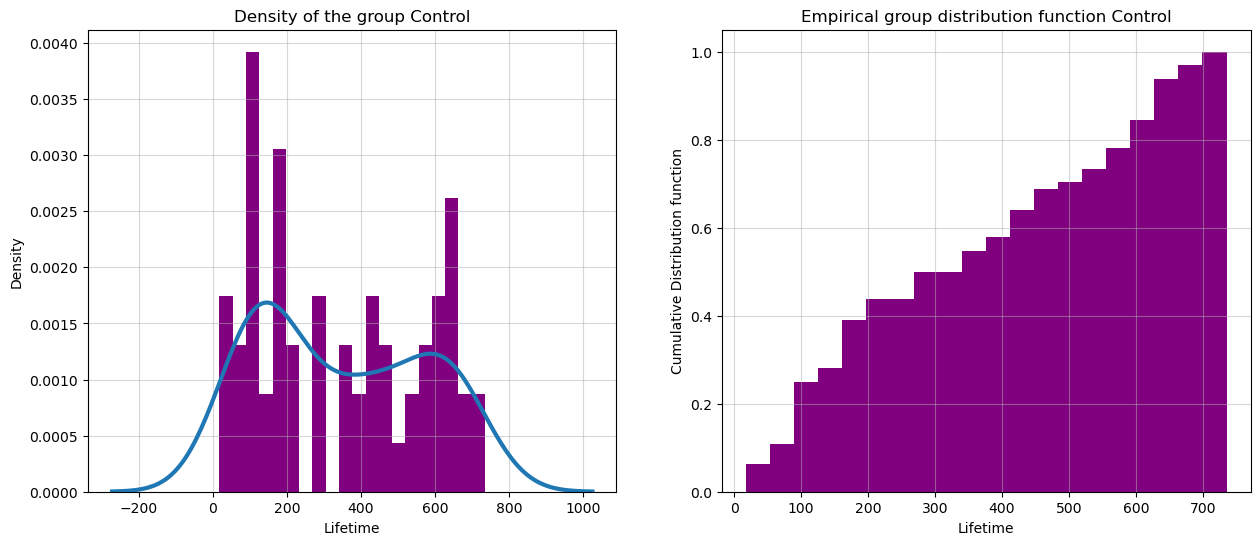

In [11]:
show_plots(control['Lifetime'], 'Control', 'purple')

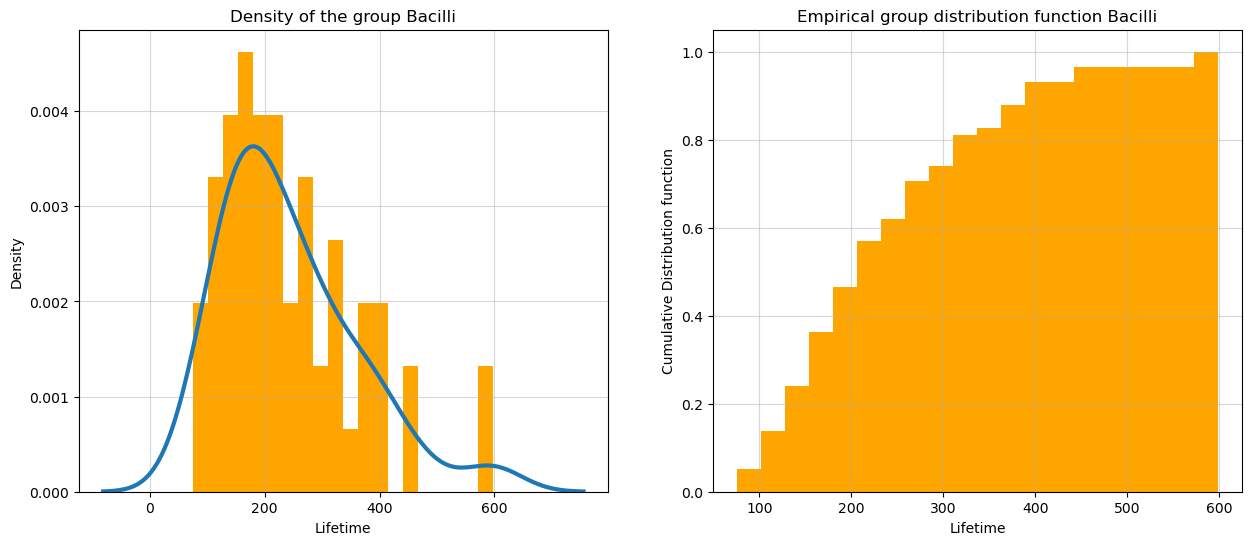

In [12]:
show_plots(bacilli['Lifetime'], 'Bacilli', 'orange')

## 3.Task
> For each group separately, find the closest distribution: estimate the parameters of the normal, exponential and uniform distributions.

> Plot the corresponding densities with the estimated parameters in histogram plots. Discuss which distribution best fits the observed data.

* Function `find_nearest_distribution` calculates the parameters for Normal, Exponential, and Uniform distributions that best fit a given dataset. It uses the method of moments, which involves computing the mean and variance of the data. 
* The function also visually compares the fits of these distributions by plotting them against a histogram of the actual data. This helps to visually assess which distribution best matches the given dataset.

In [13]:
def find_nearest_distribution(group, label):
    group = np.array(group)
    
    # Compute the first and second raw moments
    first_raw_moment = np.mean(group)
    second_raw_moment = np.mean(group**2)
    
    # Estimate parameters for a normal distribution
    mu, std = first_raw_moment, np.sqrt(second_raw_moment - first_raw_moment**2)
    print(f'Estimated mean for group "{label}" using the method of moments: {mu:.2f}')
    print(f'Estimated variance for group "{label}" using the method of moments: {std:.2f}')
    
    # Estimate parameter for an exponential distribution
    lambda_estimate = 1 / first_raw_moment
    print(f'Estimated lambda (exponential distribution) for group "{label}" using the method of moments: {lambda_estimate:.4f}')
    
    # Estimate parameters for a uniform distribution
    a, b = first_raw_moment - np.sqrt(3*(second_raw_moment - first_raw_moment**2)), first_raw_moment + np.sqrt(3*(second_raw_moment - first_raw_moment**2))
    print(f'Estimated a (uniform distribution) for group "{label}" using the method of moments: {a:.2f}')
    print(f'Estimated b (uniform distribution) for group "{label}" using the method of moments: {b:.2f}')

    # Prepare for plotting
    nbins = 10
    x = group
    x_for_exp = np.linspace(-100, 1050, 1000)
    x_for_norm = np.linspace(-300, 1050, 1000)
    fig, ax = plt.subplots(figsize=(15,6))
    ax.set_title('Illustration of different distributions on data ' + label)
    
    # Plot histogram of the data
    ax.hist(x, bins=nbins, color='skyblue', edgecolor='black', density=True, alpha=0.5)

    # Plot estimated distributions
    ax.plot(x_for_norm, stats.norm.pdf(x_for_norm, loc=mu, scale=std), color="gold", lw=3, label='Normal distribution')
    ax.plot(x_for_exp, lambda_estimate * np.exp(x_for_exp * -lambda_estimate), color="green", lw=3, label='Exponential distribution')
    ax.plot([a, b], [1 / (b - a), 1 / (b - a)], '-', color='red', lw=3, label='Uniform distribution')
    ax.plot([-300, a], [0, 0], '-', color='red', lw=3)
    ax.plot([b, 1050], [0, 0], '-', color='red', lw=3)
    
    ax.legend()
    
    return mu, std, lambda_estimate, a, b

Estimated mean for group "Control" using the method of moments: 345.23
Estimated variance for group "Control" using the method of moments: 220.45
Estimated lambda (exponential distribution) for group "Control" using the method of moments: 0.0029
Estimated a (uniform distribution) for group "Control" using the method of moments: -36.60
Estimated b (uniform distribution) for group "Control" using the method of moments: 727.07


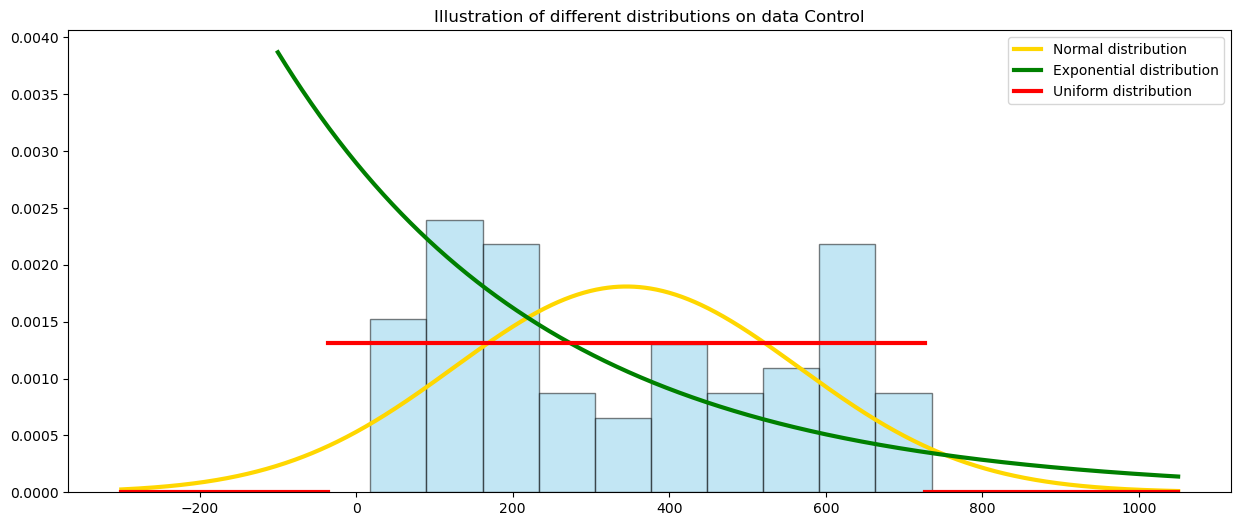

In [14]:
mu, std, lambda_estimate, a, b = find_nearest_distribution(control['Lifetime'], 'Control')

Estimated mean for group "Bacilli" using the method of moments: 242.53
Estimated variance for group "Bacilli" using the method of moments: 116.91
Estimated lambda (exponential distribution) for group "Bacilli" using the method of moments: 0.0041
Estimated a (uniform distribution) for group "Bacilli" using the method of moments: 40.04
Estimated b (uniform distribution) for group "Bacilli" using the method of moments: 445.03


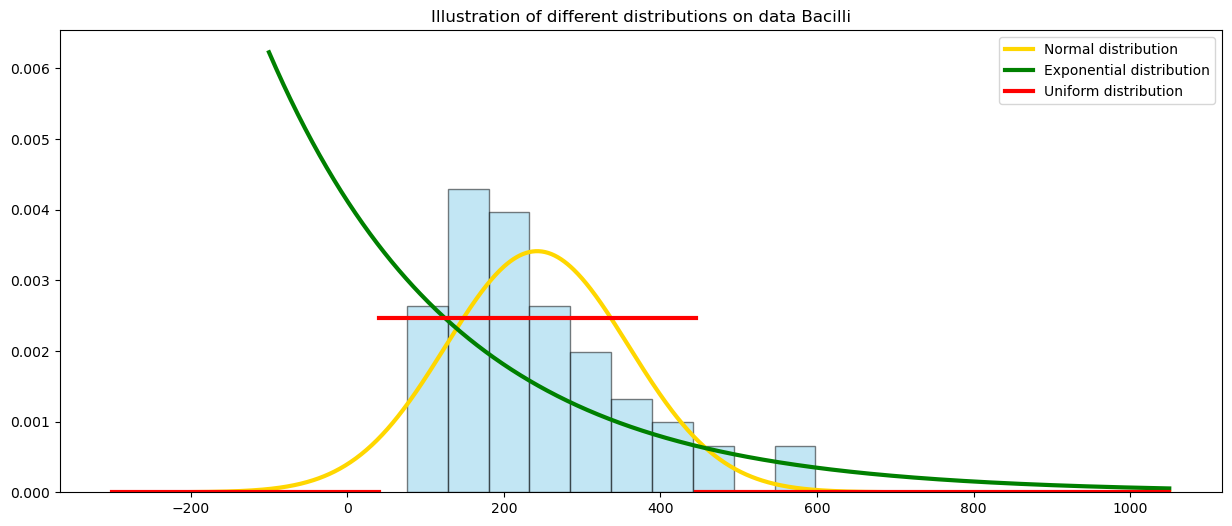

In [15]:
mu, std, lambda_estimate, a, b = find_nearest_distribution(bacilli['Lifetime'], 'Bacilli')

#### The visualizations indicate that both the "Bacilli" and "Control" groups' data align closely with the Normal distribution. This is inferred from the presence of a distinct peak around the mean and the tapering off of densities towards the ends, similar to the bell shape of the Normal distribution. This differs from the Uniform distribution, where all outcomes are equally likely, and there are no distinct peaks or intervals of increase and decrease. 
#### Hence, based on these observations, the Normal distribution seems to be the most fitting model for the given data sets.

## 4.Task
> For each group separately, generate a random sample of 100 values from the distribution you chose as the closest, with the parameters estimated in the previous section.

> Compare the histogram of the simulated values with the observed data.

* Compare the distributions of the original and simulated data. 
* Here, first estimate the parameters (mean and standard deviation) of a normal distribution based on the original data. Then, generate a new data set by drawing samples from the normal distribution defined by these parameters. 
* Plot histograms of both the original and the generated data, overlaid with the respective normal distribution densities. The aim is to visually evaluate how well the simulated data matches the original in terms of distribution.

In [16]:
def plot_gauss(axis, mu, std):
    xmin, xmax = axis.get_xlim()
    x = np.linspace(xmin, xmax, 100)
    y = stats.norm.pdf(x, mu, std)
    axis.plot(x, y, linewidth=4, color=[1, 0, 0, 0.5])

def find_nearest_distribution_silent(group):
    # Compute the first and second raw moments
    first_raw_moment = np.mean(group)
    second_raw_moment = np.mean(group**2)

    # Estimate the parameters for the normal distribution
    mu_norm = first_raw_moment
    sigma_norm = np.sqrt(second_raw_moment - mu_norm**2)

    # Estimate the parameters for the exponential distribution
    lambda_exp = 1 / first_raw_moment

    # Estimate the parameters for the uniform distribution
    a_uniform = first_raw_moment - np.sqrt(3 * (second_raw_moment - mu_norm**2))
    b_uniform = first_raw_moment + np.sqrt(3 * (second_raw_moment - mu_norm**2))

    return mu_norm, sigma_norm, lambda_exp, a_uniform, b_uniform

def show_generated_compare(data, label):
    mu, std, _, _, _ = find_nearest_distribution_silent(data)
    generated_samples = np.random.normal(mu, std, 100)
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
    axes[0].hist(generated_samples, bins=10, density=True, alpha=0.5, color='cyan', edgecolor='b')
    axes[1].hist(data, bins=6, density=True, alpha=0.6, color='darkorange', edgecolor='darkorange')
    
    plot_gauss(axes[0], mu, std)
    plot_gauss(axes[1], mu, std)

    axes[0].set_title(f'Generated data {label}')
    axes[1].set_title(f'Original data {label}')

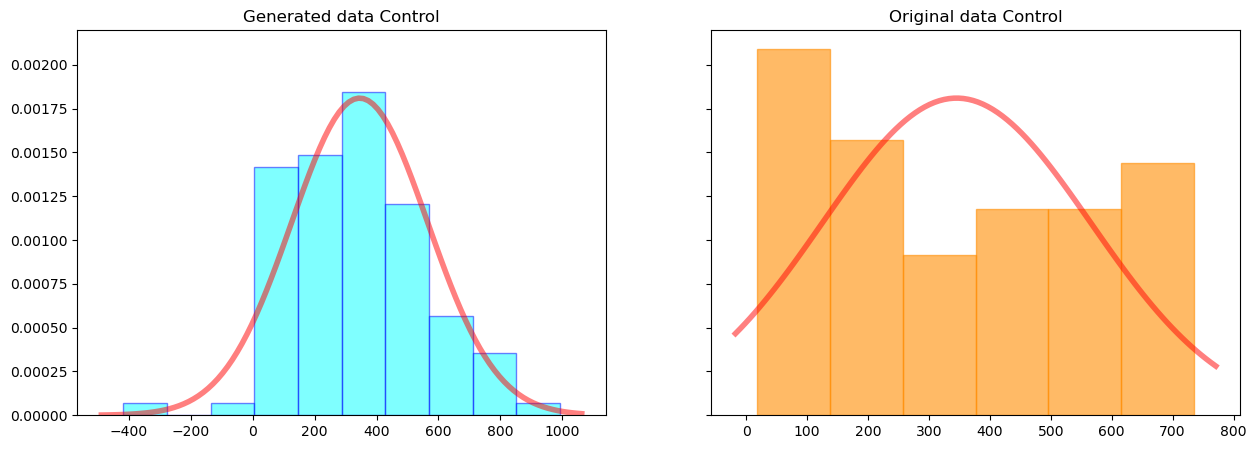

In [17]:
show_generated_compare(control['Lifetime'], 'Control')

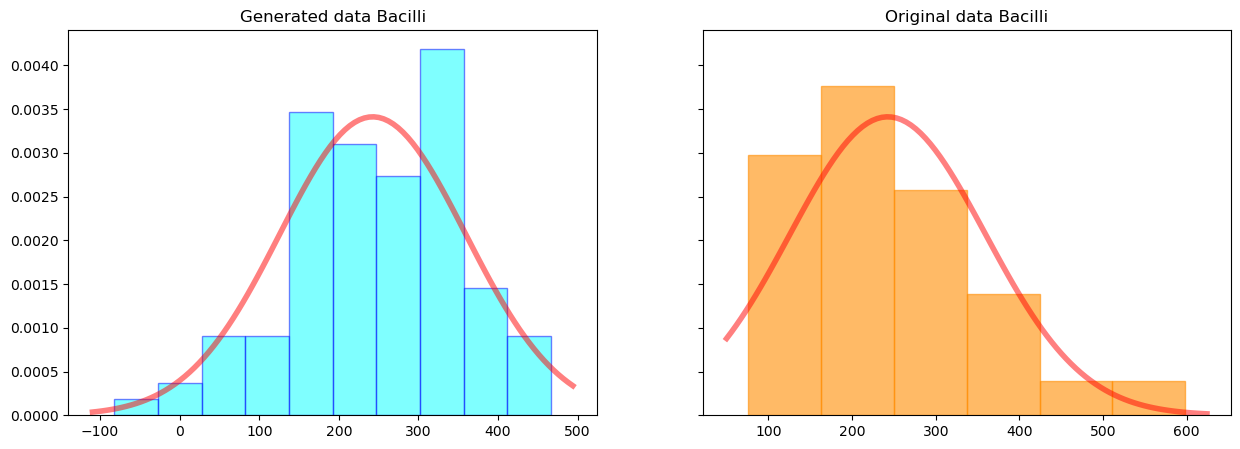

In [18]:
show_generated_compare(bacilli['Lifetime'], 'Bacilli')

#### The visual comparison of graphs suggests a high degree of similarity. The only notable deviation is the presence of a secondary peak in the "Control" group's density. Hence, it can be substantiated that the data originates from a normal distribution.

## 5.Task
> For each group separately, calculate the two-sided 95% confidence interval for the mean.

* Compute the 95% confidence interval for the mean of each group using the t-distribution. 
* The function `confidence_interval` performs this calculation. The `show_confidence_interval` function then visualizes this interval on the histogram of the data, indicating the confidence interval with two red vertical lines. This allows us to visually assess the range in which we expect the true mean of the population to lie with 95% confidence.

In [19]:
def confidence_interval(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    std_error = np.std(data, ddof=1) / sqrt(n)  # standard error
    ci_range = std_error * t.ppf((1 + confidence) / 2, n - 1)
    
    return mean - ci_range, mean + ci_range

def show_confidence_interval(data, label):
    lower_bound, upper_bound = confidence_interval(data)
    print(f'95% confidence interval for mean of group {label}:\n'
          f'({lower_bound:.2f}, {upper_bound:.2f})')

    fig, ax = plt.subplots()
    ax.hist(data, bins=6, density=True, alpha=0.6, color='teal', edgecolor='b')
    ax.axvline(x=lower_bound, color='r', alpha=0.75, lw=3)
    ax.axvline(x=upper_bound, color='r', alpha=0.75, lw=3)
    ax.set_title(f"Interval display for group {label}")

95% confidence interval for mean of group Control:
(289.73, 400.74)


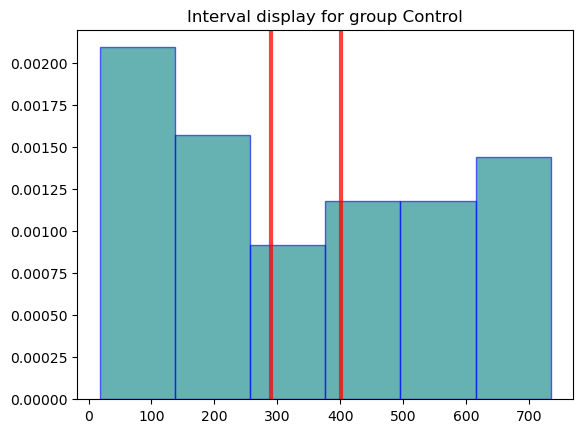

In [20]:
show_confidence_interval(control['Lifetime'], 'Control')

95% confidence interval for mean of group Bacilli:
(211.53, 273.54)


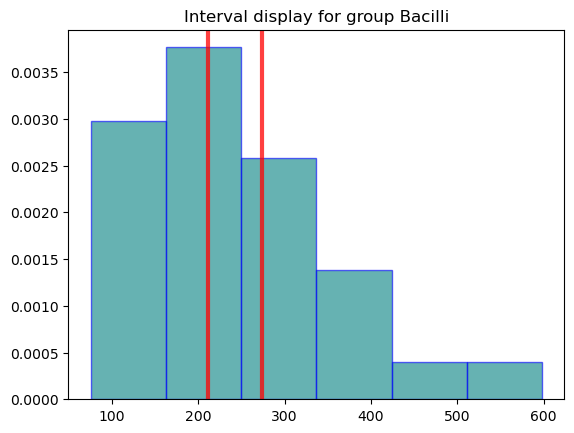

In [21]:
show_confidence_interval(bacilli['Lifetime'], 'Bacilli')

## 6.Task
> For each group separately, test at the 5% significance level the hypothesis that the mean is equal to K (the task parameter) against the two-sided alternative.

* Perform hypothesis test for each group to see if the true mean of the population equals a given value K. 
* First calculate the 95% confidence interval for the mean of the data, then check whether K lies within this interval. If K lies within the interval, do not reject the null hypothesis (that the true mean equals K). If K does not lie within the interval, reject the null hypothesis in favor of the alternative (that the true mean does not equal K). This is done at a significance level of 5% (alpha = 0.05).

In [22]:
def test_hypothesis(data, alpha, K, dataset_name):
    lower_bound, upper_bound = confidence_interval(data, 1 - alpha)
    if lower_bound <= K <= upper_bound:
        message = f'At significance level of {alpha * 100}%, we do not reject the null hypothesis for group {dataset_name}, that the mean equals {K}.'
    else:
        message = f'At significance level of {alpha * 100}%, we reject the null hypothesis for group {dataset_name}, that the mean equals {K}, in favour of the alternative.'
    print(message)

alpha = 0.05
test_hypothesis(control['Lifetime'], alpha, 3, 'Control')
test_hypothesis(bacilli['Lifetime'], alpha, 3, 'Bacilli')

At significance level of 5.0%, we reject the null hypothesis for group Control, that the mean equals 3, in favour of the alternative.
At significance level of 5.0%, we reject the null hypothesis for group Bacilli, that the mean equals 3, in favour of the alternative.


## 7.Task
> At the 5% significance level, test whether the observed groups have the same mean. Determine the type of test and the alternatives so that your choice best corresponds to the nature of the problem under study.

In [23]:
def test_equal_means(data1, data2, alpha):
    t_statistic, p_value = ttest_ind(data1, data2)
    if p_value < alpha:
        print(f'At the significance level of {alpha * 100}%, we reject the null hypothesis that the group means are equal.')
    else:
        print(f'At the significance level of {alpha * 100}%, we do not reject the null hypothesis that the group means are equal.')

alpha = 0.05
test_equal_means(control['Lifetime'], bacilli['Lifetime'], alpha)

At the significance level of 5.0%, we reject the null hypothesis that the group means are equal.
